## Time Series Forecasting with Machine Learning

In [1]:
import pandas as pd

## Loading Data

In [2]:
data = pd.read_csv('daily-minimum-temperatures-in-me.csv')

#Ensuring 'Date' column is in Datetime Format 
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)

In [3]:
data.head()

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [4]:
data.describe().T

,count,unique,top,freq
Daily minimum temperatures,3650,230,11,51


In [5]:
data.shape

(3650, 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Daily minimum temperatures  3650 non-null   object
dtypes: object(1)
memory usage: 57.0+ KB


In [7]:
data.count()  

Daily minimum temperatures    3650
dtype: int64

In [8]:
data.columns

Index(['Daily minimum temperatures'], dtype='object')

## Data Pre-Processing

In [9]:
data.nunique().sort_values()

Daily minimum temperatures    230
dtype: int64

In [10]:
print(data.isnull().sum())

Daily minimum temperatures    0
dtype: int64


In [11]:
data.duplicated().sum()

3420

## Data Visualization

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

Daily minimum temperatures    object
dtype: object


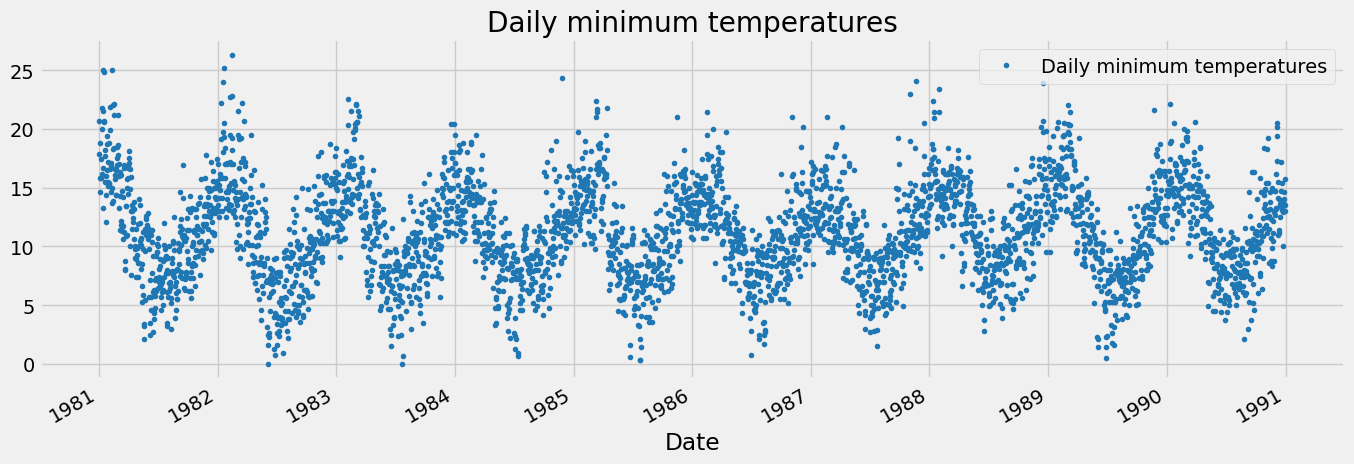

In [13]:
print(data.dtypes)
data = data.apply(pd.to_numeric, errors='coerce')  # 'coerce' will turn non-numeric values to NaN

data.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Daily minimum temperatures',
        xlabel = 'Date')
plt.show()

## Train \ Test Split

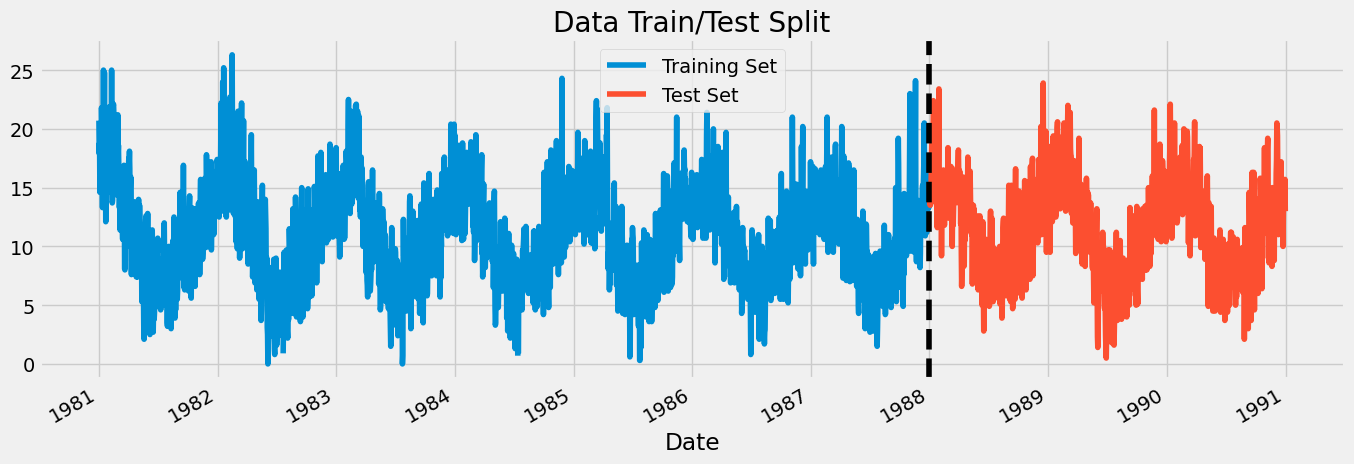

In [14]:
train = data.loc[data.index < '1988-01-01']
test = data.loc[data.index >= '1988-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('1988-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

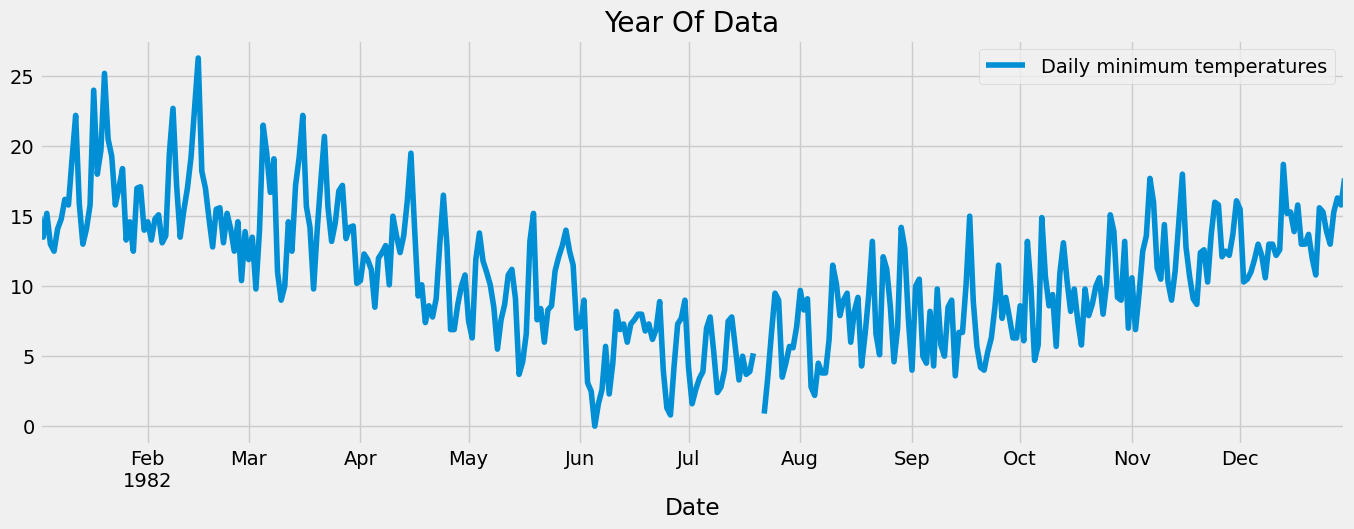

In [15]:
data.loc[(data.index > '01-01-1982') & (data.index < '31-12-1982')].plot(figsize=(15, 5), title='Year Of Data')
plt.show()

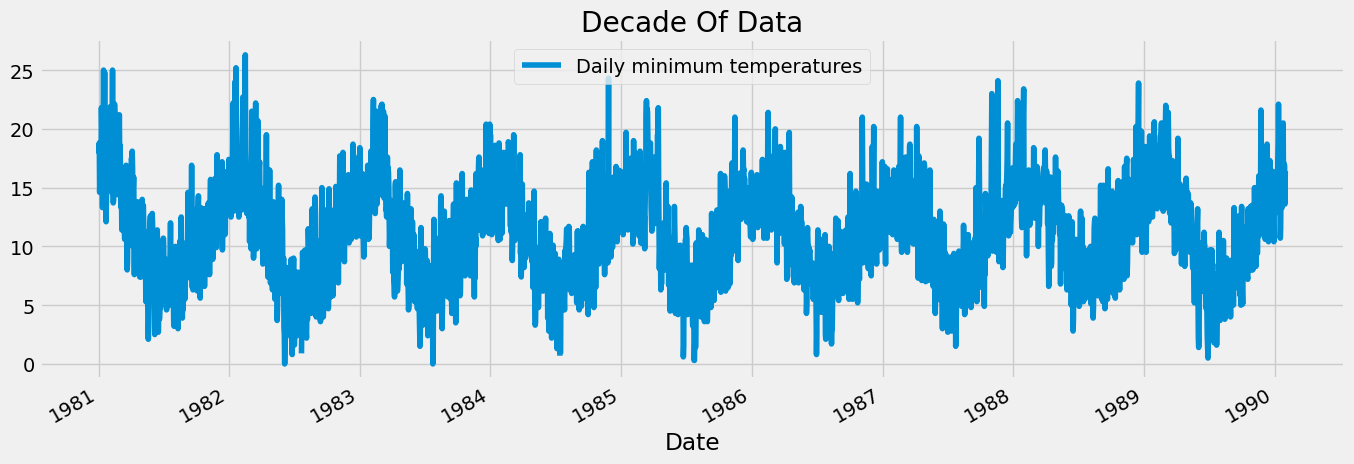

In [16]:
data.loc[(data.index > '01-01-1981') & (data.index < '31-01-1990')].plot(figsize=(15, 5), title='Decade Of Data')
plt.show()

## Visualize our Feature / Target Relationship

In [17]:
data['Daily minimum temperatures'] = pd.to_numeric(
    data['Daily minimum temperatures'],
    errors='coerce'
)

In [23]:
def create_features(data):
    data = data.copy()
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['dayofyear'] = data.index.dayofyear
    data['weekofyear'] = data.index.isocalendar().week
    return data

data = create_features(data)

In [33]:
data.head()

,Daily minimum temperatures,month,year,dayofyear,weekofyear
Date,,,,,
1981-01-01,20.7,1,1981,1,1
1981-01-02,17.9,1,1981,2,1
1981-01-03,18.8,1,1981,3,1
1981-01-04,14.6,1,1981,4,1
1981-01-05,15.8,1,1981,5,2


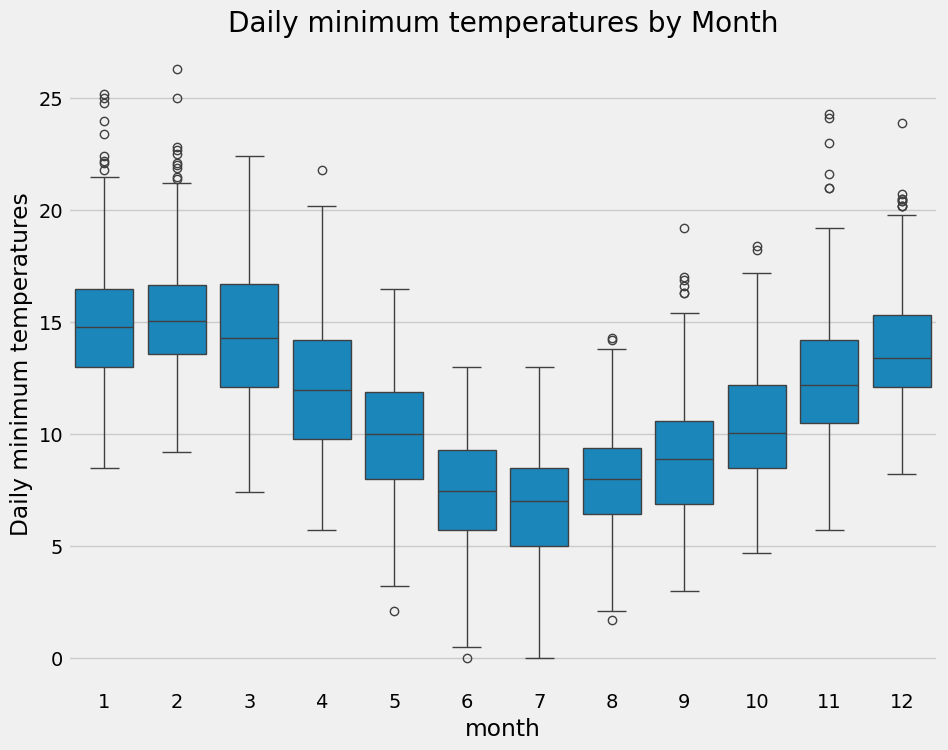

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='month', y='Daily minimum temperatures')
ax.set_title('Daily minimum temperatures by Month')
plt.show()

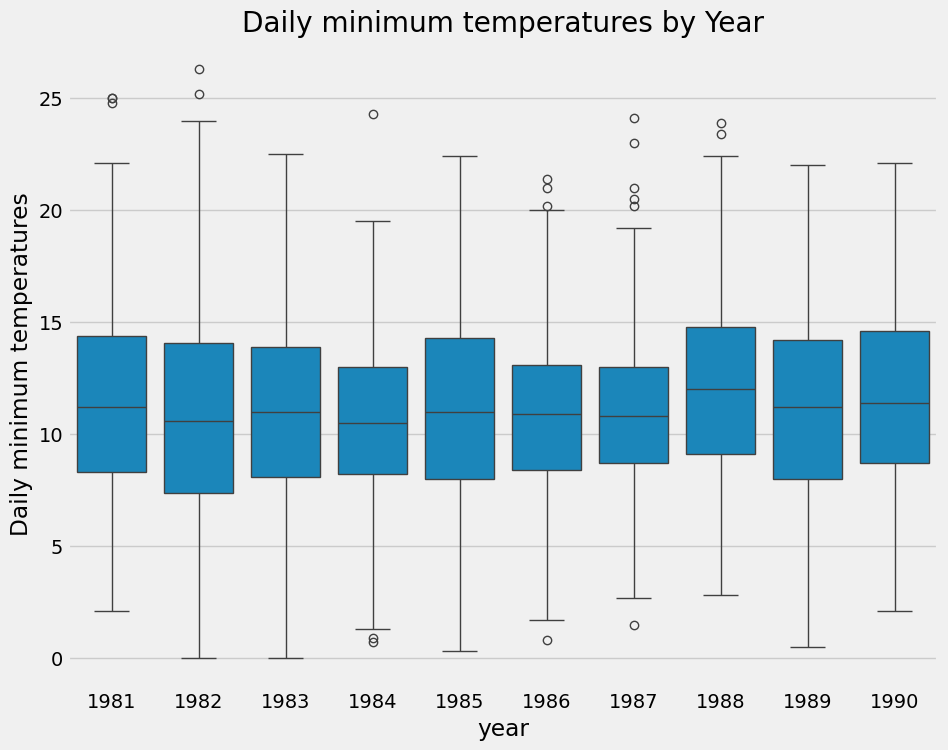

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=data, x='year', y='Daily minimum temperatures')
ax.set_title('Daily minimum temperatures by Year')
plt.show()

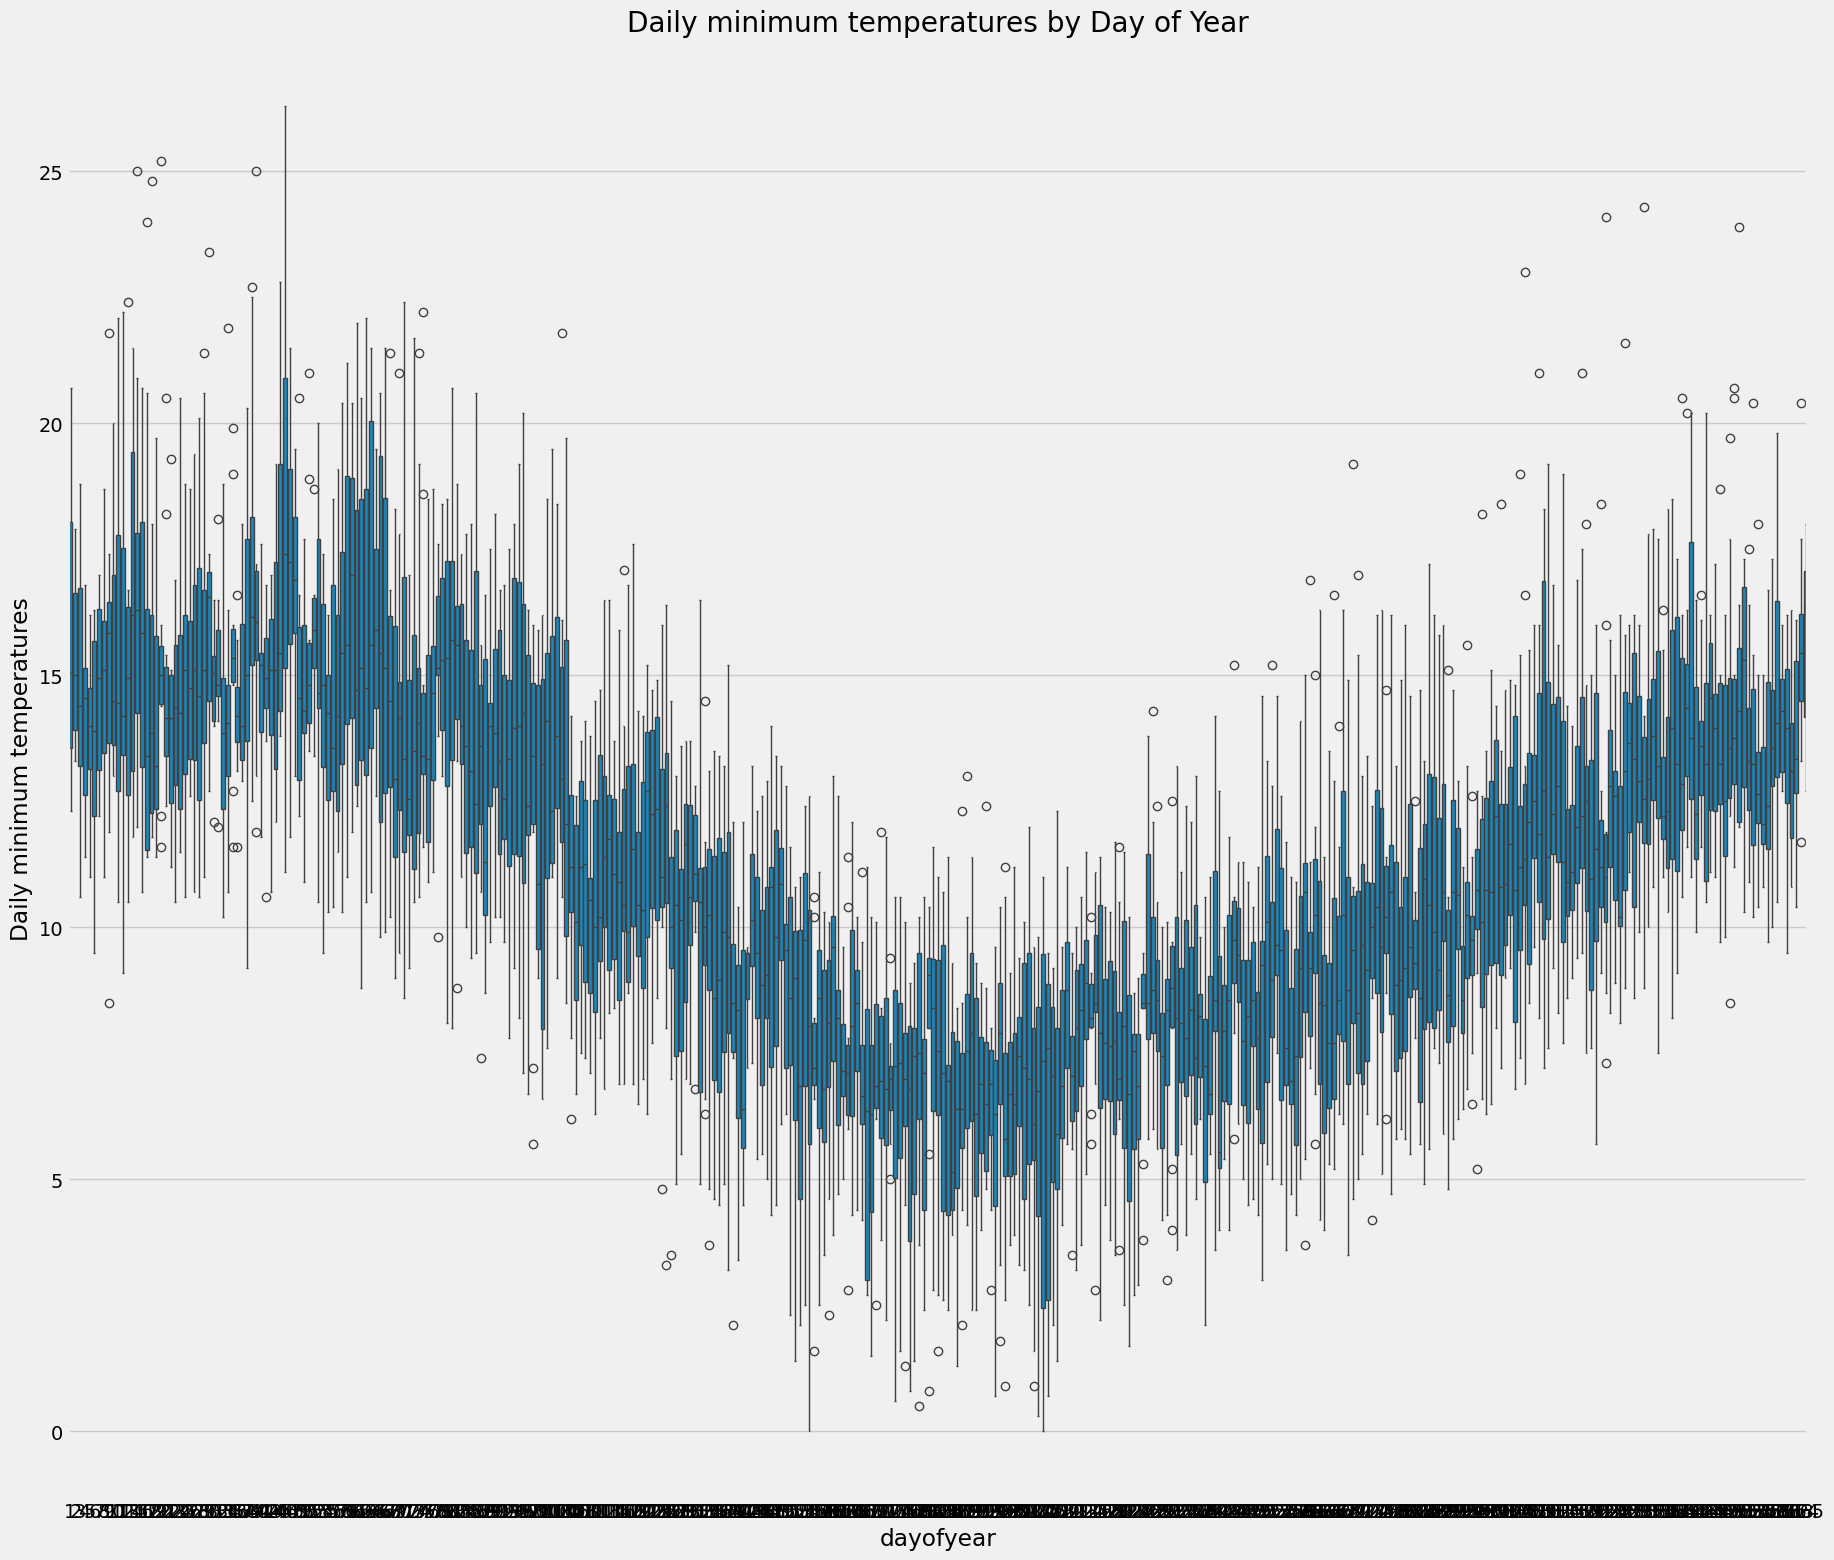

In [30]:
fig, ax = plt.subplots(figsize=(20, 18))
sns.boxplot(data=data, x='dayofyear', y='Daily minimum temperatures')
ax.set_title('Daily minimum temperatures by Day of Year')
plt.show()

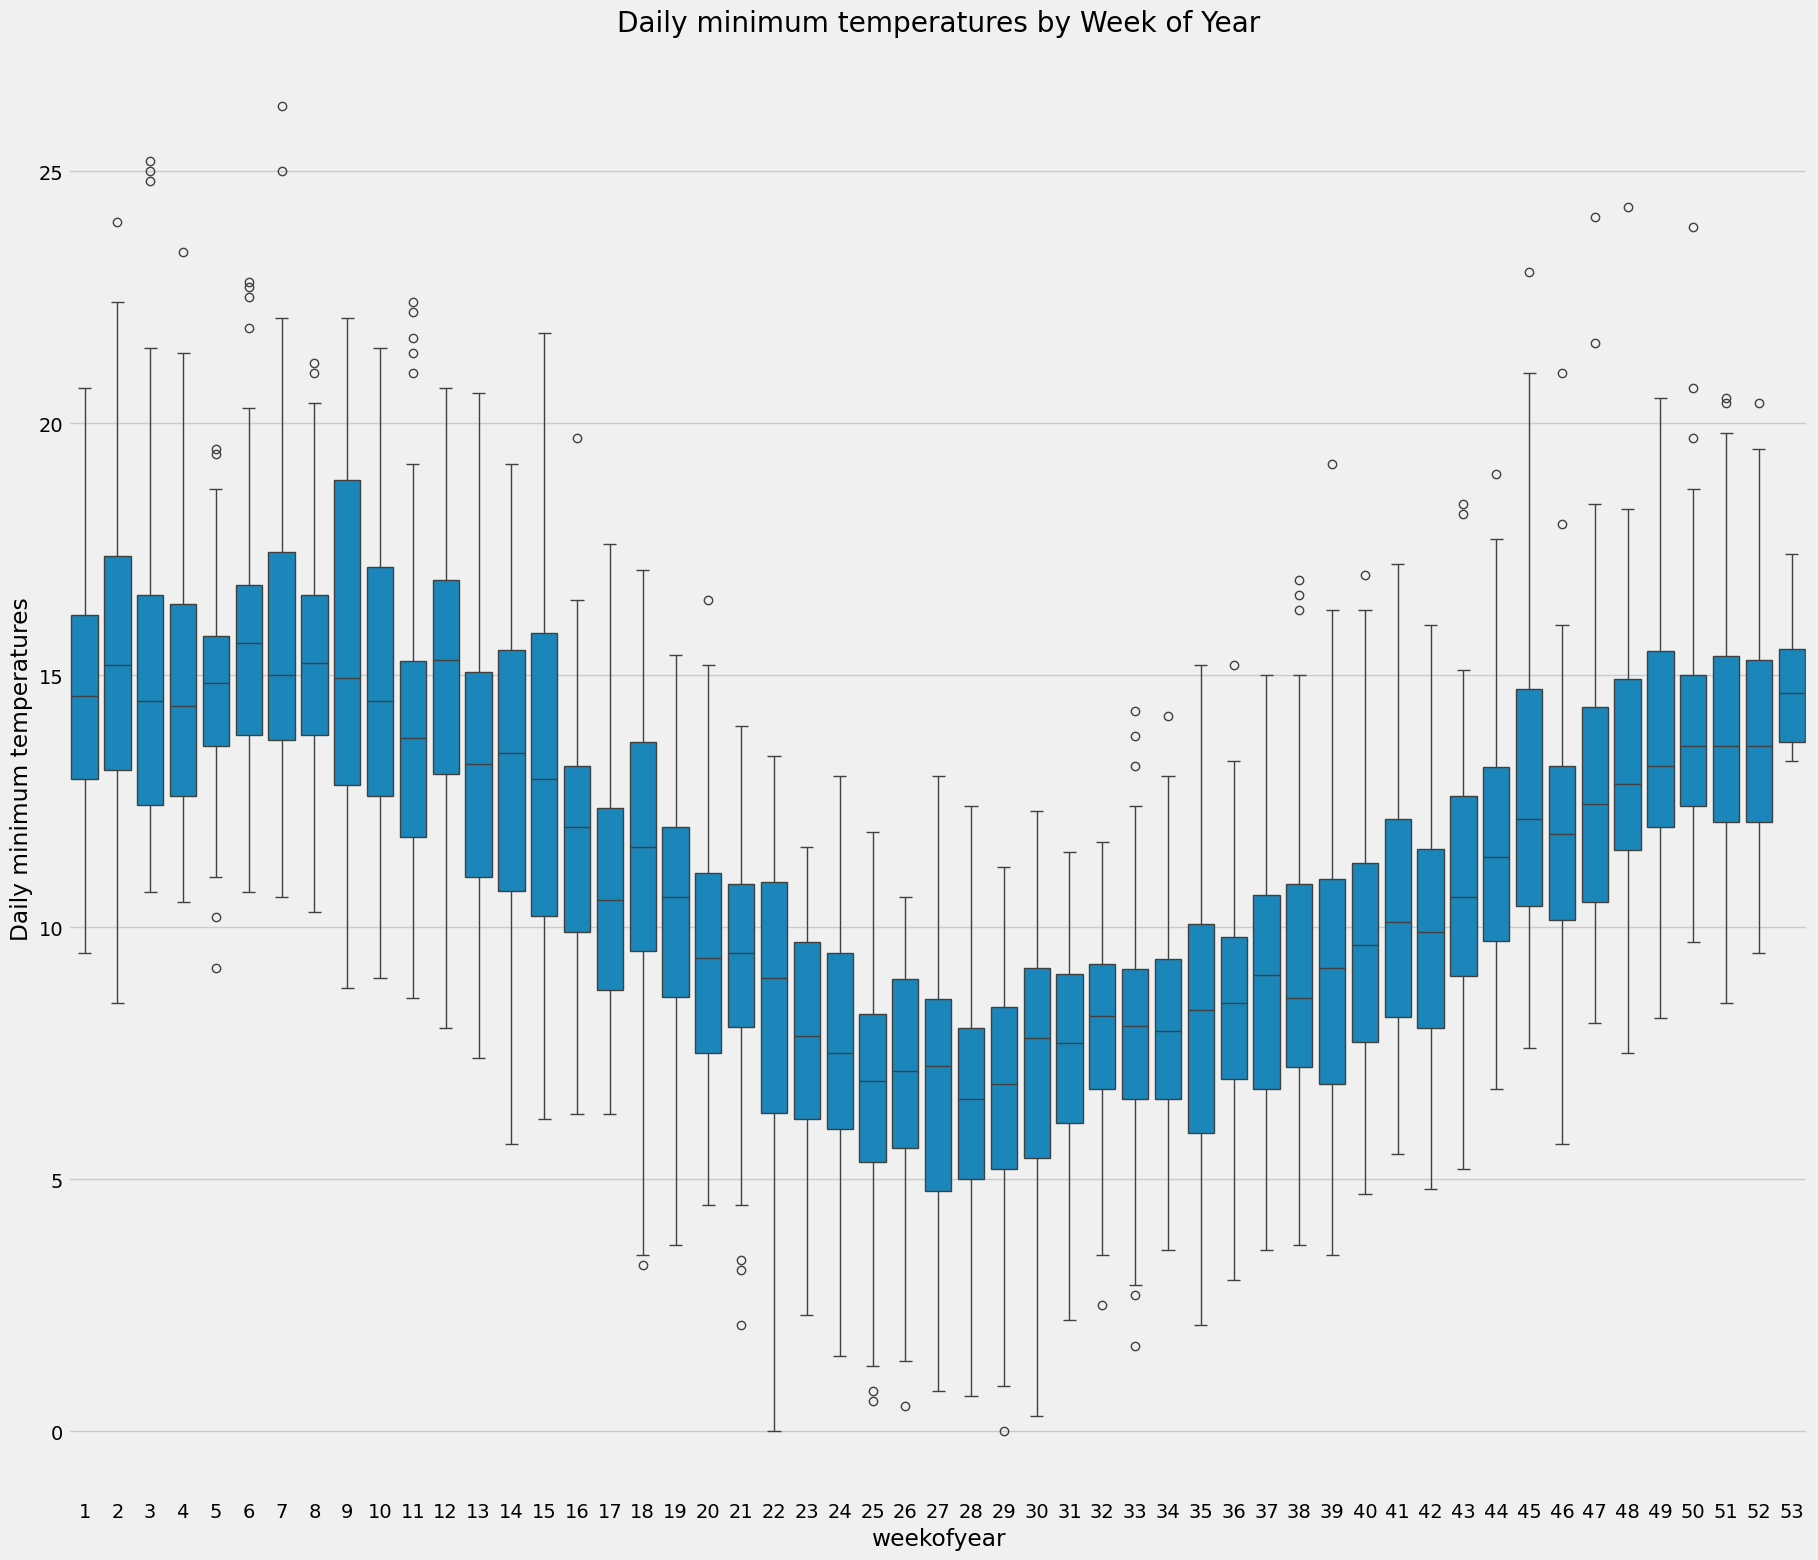

In [58]:
fig, ax = plt.subplots(figsize=(20, 18))
sns.boxplot(data=data, x='weekofyear', y='Daily minimum temperatures')
ax.set_title('Daily minimum temperatures by Week of Year')
plt.show()

## ML Model Creation

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [42]:
train = create_features(train)
test = create_features(test)

FEATURES = ['month', 'year', 'dayofyear', 'weekofyear']
TARGET = 'Daily minimum temperatures'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [47]:
#Check for NaN or infinite values in y_train and y_test
print("NaN in y_train:", np.isnan(y_train).any())
print("Inf in y_train:", np.isinf(y_train).any())
print("NaN in y_test:", np.isnan(y_test).any())
print("Inf in y_test:", np.isinf(y_test).any())

NaN in y_train: False
Inf in y_train: False
NaN in y_test: False
Inf in y_test: False


In [48]:

#Replace NaN with mean (use cautiously)
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train), posinf=np.nanmean(y_train), neginf=np.nanmean(y_train))

In [49]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:11.15182	validation_1-rmse:11.72595
[100]	validation_0-rmse:4.83577	validation_1-rmse:5.43270
[200]	validation_0-rmse:3.07057	validation_1-rmse:3.50251
[300]	validation_0-rmse:2.72275	validation_1-rmse:3.00265
[400]	validation_0-rmse:2.65194	validation_1-rmse:2.86816


C:\Users\Thabang Maja\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:21:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[500]	validation_0-rmse:2.62765	validation_1-rmse:2.81768
[600]	validation_0-rmse:2.61431	validation_1-rmse:2.79872
[700]	validation_0-rmse:2.60396	validation_1-rmse:2.79530
[743]	validation_0-rmse:2.59941	validation_1-rmse:2.79569


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

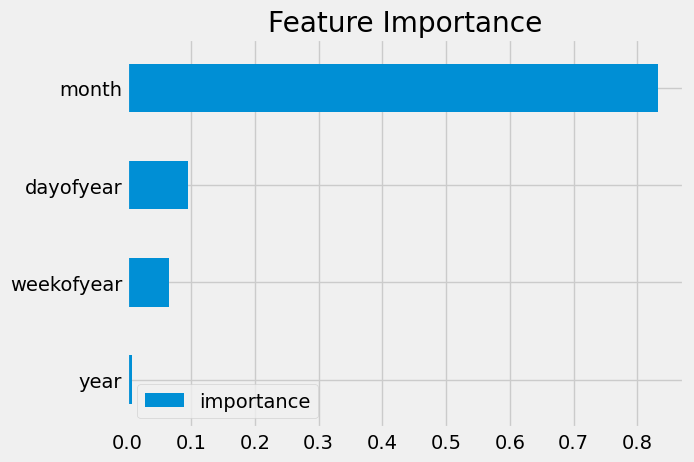

In [50]:
fi = pd.DataFrame(data = reg.feature_importances_,
             index = reg.feature_names_in_,
             columns = ['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Forecast on Test

In [ ]:
test['prediction'] = reg.predict(X_test)
data = data.merge(test[['prediction']], how='left', left_index=True, right_index=True)

In [55]:
data.head()

,Daily minimum temperatures,month,year,dayofyear,weekofyear,prediction_x,prediction_y,prediction
Date,,,,,,,,
1981-01-01,20.7,1,1981,1,1,NaN,NaN,NaN
1981-01-02,17.9,1,1981,2,1,NaN,NaN,NaN
1981-01-03,18.8,1,1981,3,1,NaN,NaN,NaN
1981-01-04,14.6,1,1981,4,1,NaN,NaN,NaN
1981-01-05,15.8,1,1981,5,2,NaN,NaN,NaN


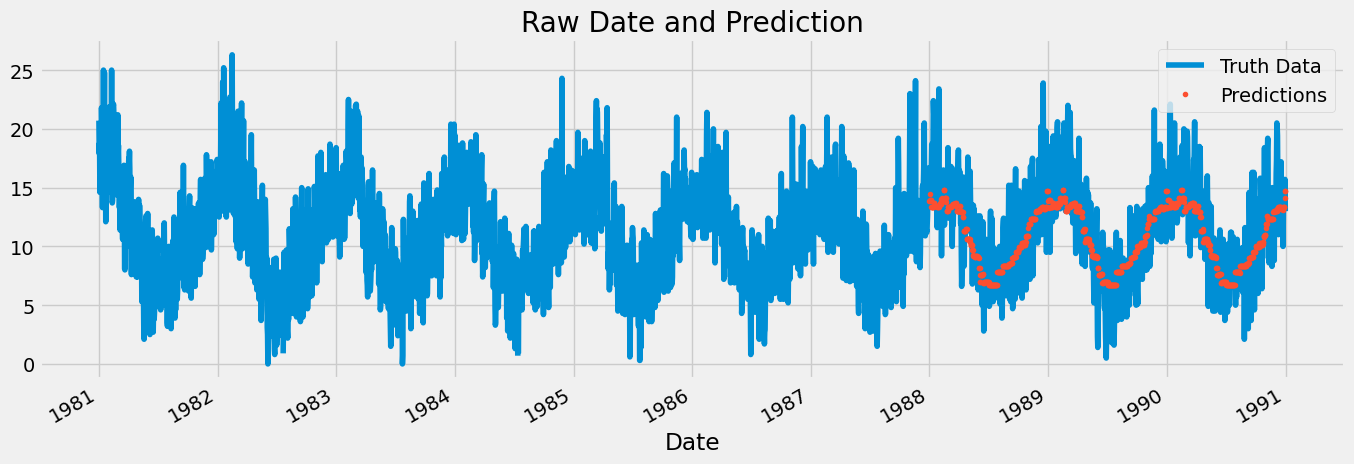

In [57]:
ax = data[['Daily minimum temperatures']].plot(figsize=(15, 5))
data['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Date and Prediction')
plt.show()

In [ ]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

## Score (RMSE)

In [59]:
score = np.sqrt(mean_squared_error(test['Daily minimum temperatures'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 2.79


## Calculate Error

In [60]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
1988-12-16    10.565372
1988-01-30     9.932566
1989-11-23     9.298420
1988-01-13     9.043416
1990-01-11     8.743416
1989-03-02     8.632830
1988-01-29     8.007716
1989-03-09     7.943379
1988-01-14     7.716350
1990-03-27     7.598209
Name: error, dtype: float64